In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import dataset dari Google Drive memakai path
path = "/content/drive/MyDrive/Colab Notebooks/cleaned_property_data.csv"
df = pd.read_csv(path, index_col=0)

In [4]:
df.head()

,agent,area,district,sub-district,land-size,bedroom,bathroom,listing-price,cluster
listing-title,,,,,,,,,
dijual maibu village gading serpong tangerang selatan,lina noviarini,BSD,Serpong,Serpong,65,2,3,1.350000e+09,1
dijual virginia village gading serpong dijual rumah hoek 2 lantai,riani,Gading Serpong,Serpong,Serpong,51,3,3,1.100000e+09,1
dijual graha raya serpong,feni chen,Serpong,Serpong,Serpong Utara,54,2,2,1.200000e+09,1
dijual cluster ciputih,jack wegie ran,Serpong,Serpong,Serpong,36,2,1,3.500000e+08,0
dijual jual rumah baru,krisna,Bintaro,Ciputat,Ciputat,77,3,2,9.990000e+08,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, dijual maibu village gading serpong tangerang selatan to dijual fresco at virginia village gading serpong
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   agent          276 non-null    object 
 1   area           276 non-null    object 
 2   district       276 non-null    object 
 3   sub-district   276 non-null    object 
 4   land-size      276 non-null    int64  
 5   bedroom        276 non-null    int64  
 6   bathroom       276 non-null    int64  
 7   listing-price  276 non-null    float64
 8   cluster        276 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 21.6+ KB


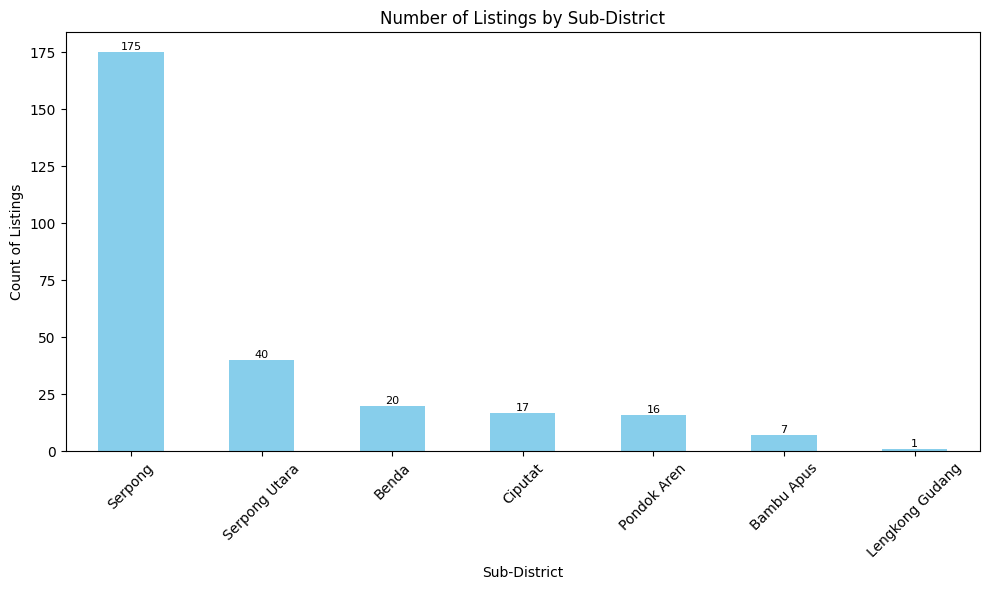

In [6]:
# Kode ini membuat plot batang yang menunjukkan jumlah listing per sub-distrik dengan menggunakan data dari kolom 'sub-district' dalam DataFrame.
subdistrict_counts = df['sub-district'].value_counts()

plt.figure(figsize=(10, 6))
bars = subdistrict_counts.plot(kind='bar', color='skyblue')

for bar, count in zip(bars.patches, subdistrict_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', fontsize=8)

plt.title('Number of Listings by Sub-District')
plt.xlabel('Sub-District')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

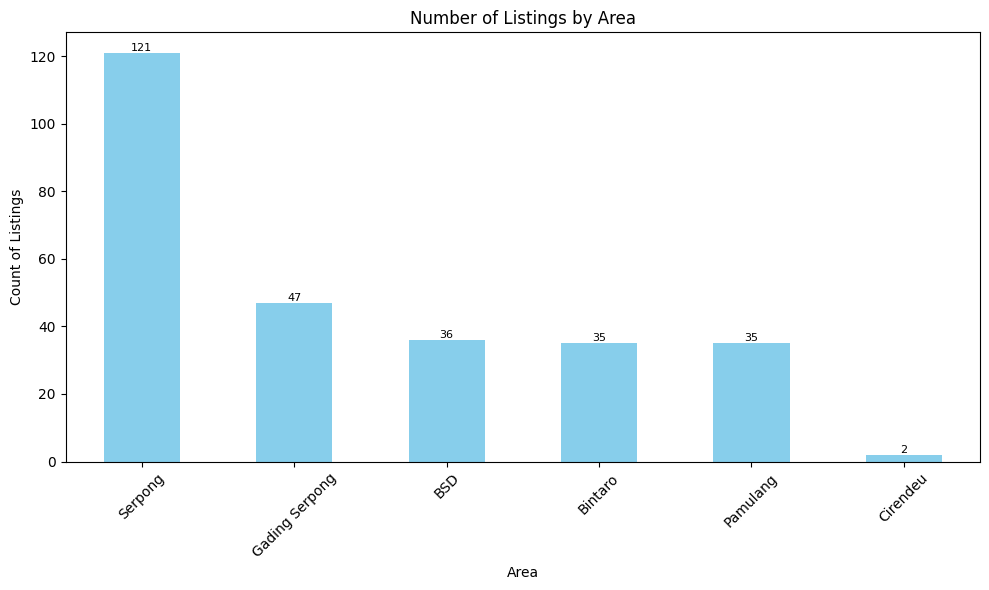

In [7]:
# Kode ini membuat plot batang yang menunjukkan jumlah listing per area dengan menggunakan data dari kolom 'area' dalam DataFrame.
area_counts = df['area'].value_counts()

plt.figure(figsize=(10, 6))
bars = area_counts.plot(kind='bar', color='skyblue')

for bar, count in zip(bars.patches, area_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', fontsize=8)

plt.title('Number of Listings by Area')
plt.xlabel('Area')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Kode ini menghitung rata-rata jumlah kamar tidur dan kamar mandi per area, dan menampilkan hasilnya dalam bentuk plot batang bertumpuk.
avg_data = df.groupby('area')[['bedroom', 'bathroom']].mean().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='bedroom', y='area', data=avg_data, color='skyblue', label='Bedroom')
sns.barplot(x='bathroom', y='area', data=avg_data, color='brown', label='Bathroom')
plt.xlabel('Average Count')
plt.ylabel('Area')
plt.title('Average Bedroom and Bathroom Count by Area')
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Kode ini menghitung rata-rata ukuran lahan per area, mengurutkan hasilnya, dan menampilkan dalam bentuk plot batang.
avg_landsize = df.groupby('area')['land-size'].mean().reset_index()

avg_landsize = avg_landsize.sort_values(by='land-size', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='area', y='land-size', data=avg_landsize, color='skyblue')
plt.xlabel('Area')
plt.ylabel('Land Size')
plt.title('Average Land Size by Area')
plt.tight_layout()
plt.show()


# K-Means Clustering

In [9]:
# Kode ini memeriksa nilai yang hilang, menghapusnya jika ada, dan menstandarisasi data numerik dalam DataFrame.

# Memeriksa nilai yang hilang
print(df.isnull().sum())

# Mengisi atau menghapus nilai yang hilang (jika ada)
df = df.dropna()

# Menstandarisasi data (jika diperlukan)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Hanya menstandarisasi kolom numerik

# Mengonversi data yang telah distandarisasi kembali ke DataFrame untuk memudahkan penanganan
scaled_df = pd.DataFrame(scaled_df, columns=df.select_dtypes(include=[np.number]).columns)
print(scaled_df.head())



agent            0
area             0
district         0
sub-district     0
land-size        0
bedroom          0
bathroom         0
listing-price    0
cluster          0
dtype: int64


NameError: name 'np' is not defined

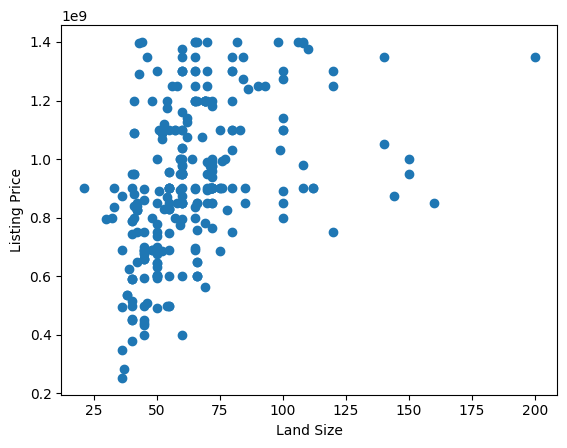

In [10]:
# Kode ini membuat scatter plot untuk menunjukkan hubungan antara ukuran lahan dan harga listing.
plt.scatter(df['land-size'], df['listing-price'])
plt.xlabel('Land Size')
plt.ylabel('Listing Price')
plt.show()


In [11]:
# Kode ini mengekstrak nilai-nilai dari kolom 'land-size' dan 'listing-price' dalam DataFrame ke dalam array numpy untuk digunakan sebagai
# data pelatihan, dan menampilkan lima baris pertama.
x_train = df[['land-size', 'listing-price']].values
x_train[:5]


array([[6.50e+01, 1.35e+09],
       [5.10e+01, 1.10e+09],
       [5.40e+01, 1.20e+09],
       [3.60e+01, 3.50e+08],
       [7.70e+01, 9.99e+08]])

In [12]:
# Kode ini melakukan normalisasi data pelatihan menggunakan MinMaxScaler dari sklearn untuk memastikan semua
# nilai berada dalam rentang [0, 1], dan menampilkan lima baris pertama dari data yang telah dinormalisasi.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train[:5]


array([[0.24581006, 0.95640802],
       [0.16759777, 0.73844813],
       [0.18435754, 0.82563208],
       [0.08379888, 0.08456844],
       [0.31284916, 0.65039233]])

In [42]:
# Kode ini menghitung inertia untuk berbagai jumlah cluster (dari 1 hingga 9) menggunakan KMeans, dan menyimpan nilai inertia untuk setiap jumlah cluster.
inertias = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

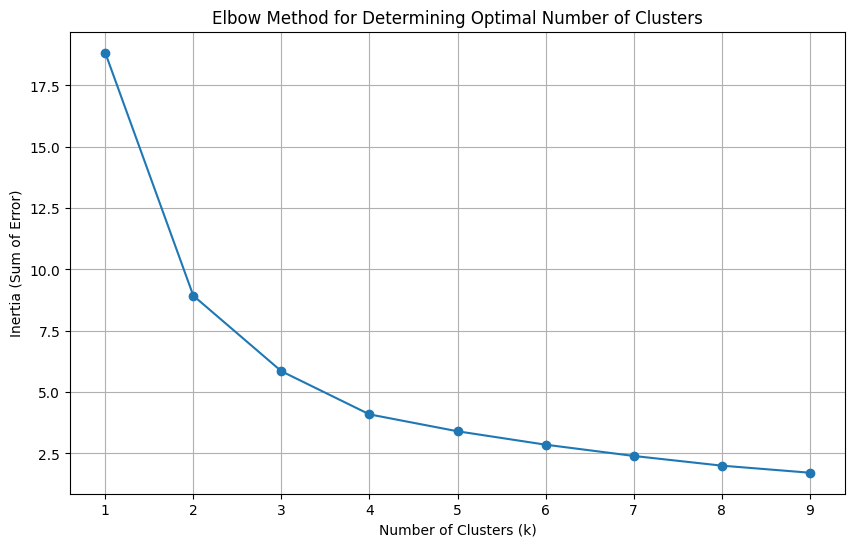

In [43]:
# Kode ini membuat plot untuk menunjukkan hubungan antara jumlah cluster (k) dan inertia (jumlah kesalahan) untuk menentukan jumlah cluster yang optimal.
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Error)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [16]:
# Kode ini mengimpor KMeans dari sklearn dan menginisialisasi model KMeans dengan 3 cluster.
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [17]:
# Kode ini melatih model KMeans dengan data pelatihan yang telah dinormalisasi dan memprediksi cluster untuk setiap data point.
y_cluster = kmean.fit_predict(x_train)
y_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1,
       0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2,
       0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2,
       1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

In [18]:
# Kode ini menambahkan hasil prediksi cluster sebagai kolom baru ke dalam DataFrame asli.
df['cluster'] = y_cluster
df

,agent,area,district,sub-district,land-size,bedroom,bathroom,listing-price,cluster
listing-title,,,,,,,,,
dijual maibu village gading serpong tangerang selatan,lina noviarini,BSD,Serpong,Serpong,65,2,3,1.350000e+09,1
dijual virginia village gading serpong dijual rumah hoek 2 lantai,riani,Gading Serpong,Serpong,Serpong,51,3,3,1.100000e+09,1
dijual graha raya serpong,feni chen,Serpong,Serpong,Serpong Utara,54,2,2,1.200000e+09,1
dijual cluster ciputih,jack wegie ran,Serpong,Serpong,Serpong,36,2,1,3.500000e+08,2
dijual jual rumah baru,krisna,Bintaro,Ciputat,Ciputat,77,3,2,9.990000e+08,0
...,...,...,...,...,...,...,...,...,...
dijual dijual rumah agnesi di kawasan symphonia gading serpong,hotnida,Gading Serpong,Serpong,Serpong,60,3,2,1.375000e+09,1
dijual dijual rumah siap huni di perumahan serpong park tangerang,cynthia,Serpong,Serpong,Serpong,86,3,2,1.238000e+09,1
dijual dijual rumah tropis 2 lantai fasilitas lengkap di serpong tangerang,anna,Serpong,Serpong,Serpong,72,3,2,9.000000e+08,0


In [26]:
# Kode ini menampilkan pusat-pusat cluster yang dihasilkan oleh model KMeans.
kmean.cluster_centers_

array([[0.23751884, 0.56200029],
       [0.31540106, 0.85643708],
       [0.15326694, 0.2907613 ]])

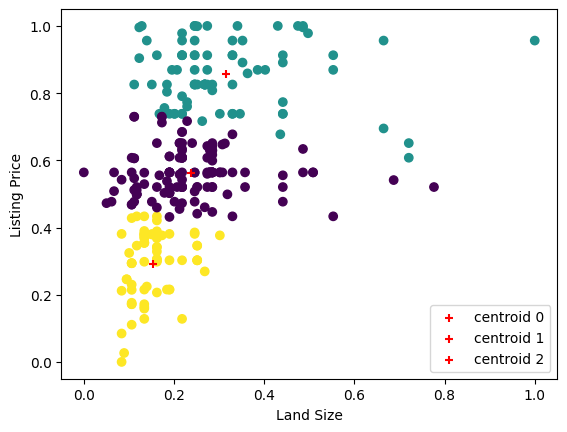

In [25]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0, 0], kmean.cluster_centers_[0, 1], c='red', marker='+', label='centroid 0')
plt.scatter(kmean.cluster_centers_[1, 0], kmean.cluster_centers_[1, 1], c='red', marker='+', label='centroid 1')
plt.scatter(kmean.cluster_centers_[2, 0], kmean.cluster_centers_[2, 1], c='red', marker='+', label='centroid 2')
plt.xlabel('Land Size')
plt.ylabel('Listing Price')
plt.legend()
plt.show()

# Naive Bayes

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [37]:
# Menginisialisasi fitur dan target
features = df[['land-size', 'bedroom', 'bathroom', 'listing-price']]
target = df['cluster']

In [38]:
# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [39]:
# Menginisialisasi dan melatih model Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [40]:
# Prediksi pada data uji
y_pred = nb_model.predict(X_test)

In [41]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9518072289156626
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.92      0.96      0.94        24
           2       1.00      0.95      0.97        19

    accuracy                           0.95        83
   macro avg       0.96      0.95      0.95        83
weighted avg       0.95      0.95      0.95        83

